# Pivot Tables with Pandas - Lab

## Introduction

In this lab, we'll learn how to make use of our newfound knowledge of pivot tables to work with real-world data.  We'll start by exploring 

## Objectives

You will be able to:

* Understand and explain what a multi-level hierarchical index is
* Understand, explain the difference and use df.pivot and pd.pivot_table
* Switch between “long” and “wide” in a DataFrame using stack() and unstack()
* Transform “wide” to “long” DataFrames using `melt`

## Getting Started

### Import Pandas and Matplotlib.pyplot Using Standard Aliases

In the cell below:

* Import `pandas` and set the standard alias
* Import `matplotlib.pyplot` and set the standard alias
* Run the ipython magic command to display matplotlib graphs inline within the notebook

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Load the Data
The data for this activity is stored in a file called `'causes_of_death.tsv'` which is a somewhat morbid dataset from the center for disease control. Note that the file extension .tsv indicates that this data is formatted slightly differently then the standard .csv, the difference being that it has 'tab seperated values' instead of 'comma seperated values'. As such, pass in the optional parameter `delimiter='\t'` into the `pd.read_csv()` method.

In [138]:
df = pd.read_csv('causes_of_death.tsv',delimiter ='\t')

Now, display the head of the DataFrame to ensure everything loaded correctly.

In [44]:
df

,State,Ten-Year Age Groups,Ten-Year Age Groups Code,Gender,Gender Code,Race,Race Code,Deaths,Population,Crude Rate
0,Alabama,< 1 year,1,Female,F,American Indian or Alaska Native,1002-5,14,3579,Unreliable
1,Alabama,< 1 year,1,Female,F,Asian or Pacific Islander,A-PI,24,7443,322.5
2,Alabama,< 1 year,1,Female,F,Black or African American,2054-5,2093,169339,1236.0
3,Alabama,< 1 year,1,Female,F,White,2106-3,2144,347921,616.2
4,Alabama,< 1 year,1,Male,M,Asian or Pacific Islander,A-PI,33,7366,448.0
5,Alabama,< 1 year,1,Male,M,Black or African American,2054-5,2732,173241,1577.0
6,Alabama,< 1 year,1,Male,M,White,2106-3,2788,364029,765.9
7,Alabama,1-4 years,1-4,Female,F,Asian or Pacific Islander,A-PI,10,30421,Unreliable
8,Alabama,1-4 years,1-4,Female,F,Black or African American,2054-5,292,670420,43.6
9,Alabama,1-4 years,1-4,Female,F,White,2106-3,385,1389699,27.7


Our data is currently in **_Wide_** format.  We can tidy this up by converting it to **_Long_** format by using groupby statements to aggregate our data into a much neater, more readable format. 

# Groupby Aggregations

Complete the following groupby statements.

# 1) Groupby State and Gender. Sum the values.

In [139]:
df.groupby(['State','Gender']).sum()


Notes  State Code   Deaths
State                Gender                            
Alabama              Female    0.0          40   430133
                     Male      0.0          41   430647
Alaska               Female    0.0          80    27199
                     Male      0.0          84    36135
Arizona              Female    0.0         180   396028
                     Male      0.0         188   442066
Arkansas             Female    0.0         195   258243
                     Male      0.0         210   264671
California           Female    0.0         282  2125965
                     Male      0.0         282  2181096
Colorado             Female    0.0         344   277787
                     Male      0.0         360   283496
Connecticut          Female    0.0         360   278653
                     Male      0.0         369   252637
Delaware             Female    0.0         340    68001
                     Male      0.0         350    67932
District of Columbia Female    0.0         352    46436
                     Male      0.0         363    47637
Florida              Female    0.0         528  1512891
                     Male      0.0         552  1618220
Georgia              Female    0.0         533   630265
                     Male      0.0         585   628752
Hawaii               Female    0.0         540    78586
                     Male      0.0         600    93658
Idaho                Female    0.0         544    97727
                     Male      0.0         608   102350
Illinois             Female    0.0         731   960785
                     Male      0.0         748   911386
Indiana              Female    0.0         702   523603
                     Male      0.0         738   508031
...                            ...         ...      ...
Oklahoma             Female    0.0        1760   327885
                     Male      0.0        1800   328650
Oregon               Female    0.0        1804   288677
                     Male      0.0        1804   287275
Pennsylvania         Female    0.0        1764  1199018
                     Male      0.0        1806  1114837
Rhode Island         Female    0.0        1496    93397
                     Male      0.0        1672    82869
South Carolina       Female    0.0        1710   360313
                     Male      0.0        1935   372258
South Dakota         Female    0.0        1518    63781
                     Male      0.0        1656    64818
Tennessee            Female    0.0        1880   533373
                     Male      0.0        1927   533354
Texas                Female    0.0        2112  1457648
                     Male      0.0        2208  1511566
Utah                 Female    0.0        2058   127955
                     Male      0.0        2156   132524
Vermont              Female    0.0        1150    48868
                     Male      0.0        1300    46432
Virginia             Female    0.0        2091   542518
                     Male      0.0        2244   528645
Washington           Female    0.0        2332   431062
                     Male      0.0        2385   434624
West Virginia        Female    0.0        1674   193664
                     Male      0.0        1674   192560
Wisconsin            Female    0.0        2420   436397
                     Male      0.0        2420   421232
Wyoming              Female    0.0        1792    37153
                     Male      0.0        1960    40233

[102 rows x 3 columns]

# 2) Groupby State and Gender and Race. Find the average values.

In [46]:
df.groupby(['State','Gender','Race']).mean()

Deaths
State         Gender Race                                          
Alabama       Female American Indian or Alaska Native     70.875000
                     Asian or Pacific Islander            95.500000
                     Black or African American          9074.000000
                     White                             29890.636364
              Male   American Indian or Alaska Native     86.375000
                     Asian or Pacific Islander            78.400000
                     Black or African American          9298.000000
                     White                             27241.166667
Alaska        Female American Indian or Alaska Native    597.909091
                     Asian or Pacific Islander           124.777778
                     Black or African American            79.444444
                     White                              1707.636364
              Male   American Indian or Alaska Native    738.272727
                     Asian or Pacific Islander           122.400000
                     Black or African American           106.400000
                     White                              2338.727273
Arizona       Female American Indian or Alaska Native   1309.727273
                     Asian or Pacific Islander           376.272727
                     Black or African American           995.090909
                     White                             30544.666667
              Male   American Indian or Alaska Native   1586.500000
                     Asian or Pacific Islander           365.272727
                     Black or African American          1130.083333
                     White                             33787.416667
Arkansas      Female American Indian or Alaska Native     61.571429
                     Asian or Pacific Islander            86.900000
                     Black or African American          3136.818182
                     White                             20221.636364
              Male   American Indian or Alaska Native     64.111111
                     Asian or Pacific Islander            84.636364
...                                                             ...
Washington    Female Black or African American           913.727273
                     White                             36369.272727
              Male   American Indian or Alaska Native    625.818182
                     Asian or Pacific Islander          1375.727273
                     Black or African American          1221.818182
                     White                             33263.916667
West Virginia Female American Indian or Alaska Native     16.250000
                     Asian or Pacific Islander            36.600000
                     Black or African American           534.818182
                     White                             17048.454545
              Male   American Indian or Alaska Native     15.250000
                     Asian or Pacific Islander            28.800000
                     Black or African American           543.545455
                     White                             16943.272727
Wisconsin     Female American Indian or Alaska Native    273.181818
                     Asian or Pacific Islander           218.727273
                     Black or African American          1645.000000
                     White                             37535.545455
              Male   American Indian or Alaska Native    306.636364
                     Asian or Pacific Islander           221.000000
                     Black or African American          1861.181818
                     White                             35905.000000
Wyoming       Female American Indian or Alaska Native     77.500000
                     Asian or Pacific Islander            24.200000
                     Black or African American            30.500000
                     White                              3279.454545
              Male   American Indian or Alaska Na

# 3) Groupby Gender and Race. Find the minimum values.

In [140]:
df.groupby(['Gender','Race']).min()


Notes    State  State Code  \
Gender Race                                                           
Female American Indian or Alaska Native    NaN  Alabama           1   
       Asian or Pacific Islander           NaN  Alabama           1   
       Black or African American           NaN  Alabama           1   
       White                               NaN  Alabama           1   
Male   American Indian or Alaska Native    NaN  Alabama           1   
       Asian or Pacific Islander           NaN  Alabama           1   
       Black or African American           NaN  Alabama           1   
       White                               NaN  Alabama           1   

                                        Ten-Year Age Groups  \
Gender Race                                                   
Female American Indian or Alaska Native           1-4 years   
       Asian or Pacific Islander                  1-4 years   
       Black or African American                  1-4 years   
       White                                      1-4 years   
Male   American Indian or Alaska Native           1-4 years   
       Asian or Pacific Islander                  1-4 years   
       Black or African American                  1-4 years   
       White                                      1-4 years   

                                        Ten-Year Age Groups Code Gender Code  \
Gender Race                                                                    
Female American Indian or Alaska Native                        1           F   
       Asian or Pacific Islander                               1           F   
       Black or African American                               1           F   
       White                                                   1           F   
Male   American Indian or Alaska Native                        1           M   
       Asian or Pacific Islander                               1           M   
       Black or African American                               1           M   
       White                                                   1           M   

                                        Race Code  Deaths Population  \
Gender Race                                                            
Female American Indian or Alaska Native    1002-5      10     100285   
       Asian or Pacific Islander             A-PI      10     100371   
       Black or African American           2054-5      10     100170   
       White                               2106-3      12    1000704   
Male   American Indian or Alaska Native    1002-5      10       1001   
       Asian or Pacific Islander             A-PI      10    1000019   
       Black or African American           2054-5      10       1000   
       White                               2106-3      10    1005401   

                                        Crude Rate  
Gender Race                                         
Female American Indian or Alaska Native       10.4  
       Asian or Pacific Islander              10.1  
       Black or African American             100.3  
       White                                  10.1  
Male   American Indian or Alaska Native    10000.0  
       Asian or Pacific Islander              10.0  
       Black or African American            1000.4  
       White                                  10.6

## 4) Create a bar chart of the total number of deaths by state.
* Sort your columns in order (ascending or descending are both acceptable).  
* Also make sure to include a title, axes labels and have your graph be an appropriate size.

**_NOTE:_** In order to do this, slice the `Deaths` column after the `.groupby()` method, but before the `sum()` method.  You can even chain the `.plot()` call on after the `sum()` call and do this all on one line, excluding the labeling of the graph!

Text(0.5, 1.0, 'Deaths per state')

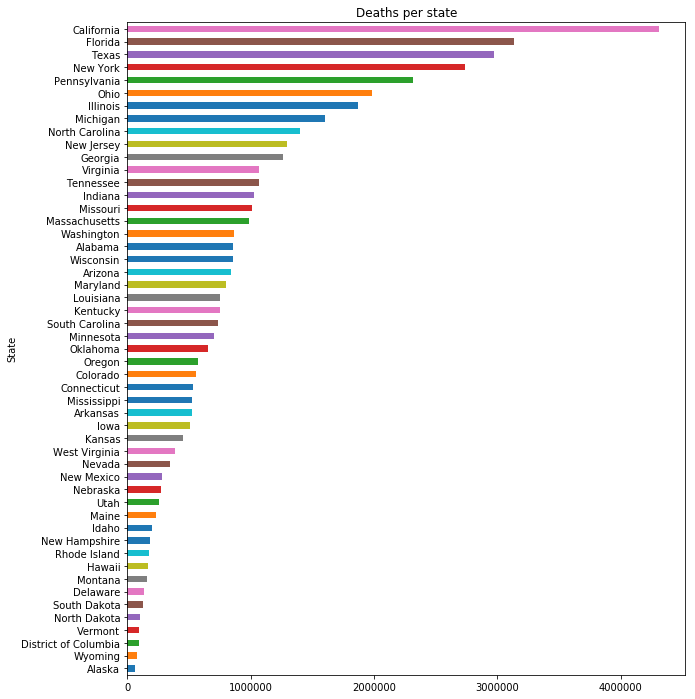

In [141]:
#df = df.drop(['Notes','State Code'],axis =1)
df.groupby(['State'])['Deaths'].sum().sort_values().plot(kind='barh',figsize=(10,12))
plt.title('Deaths per state')

### Inspecting our Data

Let's go one step further and get a print-out of the data type of each column. 

In the cell below, get the `.info()` of our DataFrame, and note the data type that each column is currently stored as.  

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4115 entries, 0 to 4114
Data columns (total 12 columns):
Notes                       0 non-null float64
State                       4115 non-null object
State Code                  4115 non-null int64
Ten-Year Age Groups         4115 non-null object
Ten-Year Age Groups Code    4115 non-null object
Gender                      4115 non-null object
Gender Code                 4115 non-null object
Race                        4115 non-null object
Race Code                   4115 non-null object
Deaths                      4115 non-null int64
Population                  4115 non-null object
Crude Rate                  4115 non-null object
dtypes: float64(1), int64(2), object(9)
memory usage: 385.9+ KB


Let's look at some samples from the Population column to see if the current encoding seems appropriate for the data it contains. 

In the cell below, display the population values for the first 5 rows in the DataFrame.  

In [143]:
df['Population'].head(5)

0      3579
1      7443
2    169339
3    347921
4      7366
Name: Population, dtype: object

Just to be extra sure, let's check the value counts to see how many times each unqiue value shows up in the dataset. We'll only look at the top 5. 

In the cell below, print out the top 5 `value_counts()` of the population column of the DataFrame. 

In [144]:
df['Population'].head(5).value_counts()

347921    1
7443      1
3579      1
169339    1
7366      1
Name: Population, dtype: int64

Clearly, this data should be stored as a numeric type, not a categorical type.  

### 5a) Reformat the Population Column as an Integer
As stands, not all values will be able to be reformated as integers. Most of the cells in the the `Population` column contain integer values, but the entire column is currently encoded in string format because some cells contain the string `"Not Applicable"`.

We need to remove these rows before we can cast the Population column to an Integer data type. 

In the cell below:

* Slice the rows of `df` where the Population column is equal to `'Not Applicable'`.
* Use `to_drop.index`  to drop the offending rows from `df`. Be sure to set the `axis=0`, and `inplace=True`
* Cast the Population column to an integer data type using the `.astype()` function, with the single parameter `int64` passed in. 
* Print the Population column's `dtype` attribute to confirm it is now stored in `int64` format. 

**_NOTE:_** `.astype()` returns a copy of the column, so make sure you set the Population column equal to what this method returns--don't just call it!

In [145]:
#Your code here
to_drop = df[~df['Population'].isin(['Not Applicable'])]

df['Population']=to_drop['Population'].astype(int)


### 5b) Complete the Bar Chart

Now that we've reformatted our data, let's create a bar chart of the of the Mean Population by State.

Text(0.5, 1.0, 'Population per state')

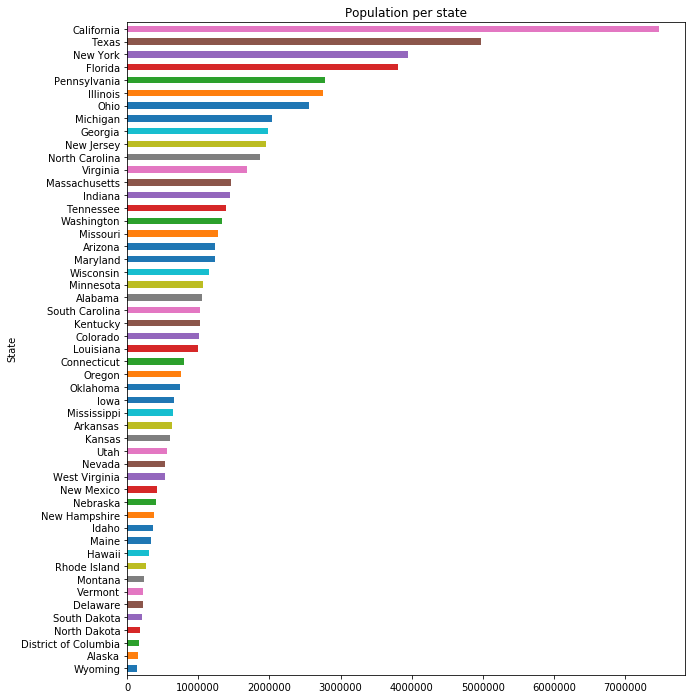

In [146]:
#Your code here
df.groupby(['State'])['Population'].mean().sort_values().plot(kind='barh',figsize=(10,12))
plt.title('Population per state')

Below we will investigate how we can combine the **pivot** method along with the **groupby** method to combine some cool **stacked bar charts**!

### Using Aggregate Functions

In the cell below:

* Group `df` by `'State'` and  `'Gender'`, and then slice both `'Death'` and `'Population'` from it. Chain the `.agg()` method to return the mean, min, max, and standard deviation these sliced columns. 

**_NOTE:_** This only requires one line of code.  

By now, you've probably caught on that the code required to do this follows this pattern:    `([things to group by])[columns to slice].agg([aggregates to return])`

Then, display the head of this of this new DataFrame.

In [147]:
# A sample groupby similar to above. 
grouped = df.groupby(['State','Gender'])['Deaths','Population'].agg(['mean','min','max','std'])
grouped

Deaths                             \
                                     mean min     max            std   
State                Gender                                            
Alabama              Female  10753.325000  10  116297   24612.250487   
                     Male    10503.585366  10   88930   20620.218089   
Alaska               Female    679.975000  13    4727    1154.870455   
                     Male      860.357143  12    5185    1411.777392   
Arizona              Female   8800.622222  21  133923   25979.871632   
                     Male     9405.659574  12  110347   24040.140616   
Arkansas             Female   6621.615385  11   81126   16794.044835   
                     Male     6301.690476  10   61671   14165.374833   
California           Female  45233.297872  16  720306  128295.350557   
                     Male    46406.297872  29  473226  105895.671455   
Colorado             Female   6460.162791  11  102790   19302.972849   
                     Male     6299.911111  11   67020   15620.679010   
Connecticut          Female   6966.325000  12  123075   22224.965241   
                     Male     6161.878049  11   65879   15640.812407   
Delaware             Female   2000.029412  11   21627    4641.612706   
                     Male     1940.914286  13   15976    3808.261525   
District of Columbia Female   1451.125000  11   10428    2649.402766   
                     Male     1443.545455  10    7066    2224.158943   
Florida              Female  34383.886364  19  550300  102083.683121   
                     Male    35178.695652  10  411612   90181.617401   
Georgia              Female  15372.317073  20  162447   33653.636538   
                     Male    13972.266667  12  116794   27107.464138   
Hawaii               Female   2182.944444  10   23476    4781.899001   
                     Male     2341.450000  11   18791    4436.617804   
Idaho                Female   2874.323529  11   38088    7990.822485   
                     Male     2693.421053  15   27053    6665.940386   
Illinois             Female  22343.837209  13  348960   63471.895209   
                     Male    20713.318182  15  210711   47040.841500   
Indiana              Female  13425.717949  11  185795   37468.783350   
                     Male    12391.000000  12  126266   29312.563707   
...                                   ...  ..     ...            ...   
Oklahoma             Female   7451.931818  11  103703   20397.710505   
                     Male     7303.333333  14   76790   17036.852025   
Oregon               Female   6560.840909  10  115055   21138.542646   
                     Male     6528.977273  13   74395   17478.932830   
Pennsylvania         Female  28548.047619  10  473687   87939.693608   
                     Male    25926.441860  20  297094   65452.508006   
Rhode Island         Female   2746.970588  10   42473    8334.872239   
                     Male     2180.763158  11   22680    5490.232129   
South Carolina       Female   9481.921053  11   93345   20174.693792   
                     Male     8657.162791  12   72346   16791.712315   
South Dakota         Female   1932.757576  14   28814    5607.382037   
                     Male     1800.500000  10   17216    4260.226617   
Tennessee            Female  13334.325000  13  161305   33524.701804   
                     Male    13008.634146  15  118394   28057.888138   
Texas                Female  33128.363636  11  451158   88400.130788   
                     Male    32860.130435  11  332525   74959.768803   
Utah                 Female   3046.547619  10   47195    9077.541206   
                     Male     3011.909091  11   32732    7526.416912   
Vermont              Female   2124.695652  10   20967    5088.560561   
                     Male     1785.846154  12   12790    3701.620269   
Virginia             Female  13232.146341  10  166555   32699.660272   
                     Male    12014.659091  17  113238   25369.085907   
Was

Note how Pandas denotes a multi-hierarchical index in the DataFrame above.  

Let's inspect how a multi-hierarchical index is actually stored.  

In the cell below, display the `index` attribute of this DataFrame. 

In [148]:
grouped.index

MultiIndex(levels=[['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'], ['Female', 'Male']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 20, 20, 21, 21, 22, 22, 23, 23, 24, 24, 25, 25, 26, 26, 27, 27, 28, 28, 29, 29, 30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 

A two-dimensional array denotes the multiple levels, with each possible combination being a row in our `grouped` DataFrame.  

Let's reset the index, and then see how it changes. 

In the cell below, call the DataFrame's `reset_index()` function.  Then, display the head of the DataFrame.  

In [149]:
# First, reset the index. Notice the subtle difference; State and Gender are now columns rather then the index.
grouped = grouped.reset_index()
grouped

State  Gender        Deaths                             \
                                           mean min     max            std   
0                 Alabama  Female  10753.325000  10  116297   24612.250487   
1                 Alabama    Male  10503.585366  10   88930   20620.218089   
2                  Alaska  Female    679.975000  13    4727    1154.870455   
3                  Alaska    Male    860.357143  12    5185    1411.777392   
4                 Arizona  Female   8800.622222  21  133923   25979.871632   
5                 Arizona    Male   9405.659574  12  110347   24040.140616   
6                Arkansas  Female   6621.615385  11   81126   16794.044835   
7                Arkansas    Male   6301.690476  10   61671   14165.374833   
8              California  Female  45233.297872  16  720306  128295.350557   
9              California    Male  46406.297872  29  473226  105895.671455   
10               Colorado  Female   6460.162791  11  102790   19302.972849   
11               Colorado    Male   6299.911111  11   67020   15620.679010   
12            Connecticut  Female   6966.325000  12  123075   22224.965241   
13            Connecticut    Male   6161.878049  11   65879   15640.812407   
14               Delaware  Female   2000.029412  11   21627    4641.612706   
15               Delaware    Male   1940.914286  13   15976    3808.261525   
16   District of Columbia  Female   1451.125000  11   10428    2649.402766   
17   District of Columbia    Male   1443.545455  10    7066    2224.158943   
18                Florida  Female  34383.886364  19  550300  102083.683121   
19                Florida    Male  35178.695652  10  411612   90181.617401   
20                Georgia  Female  15372.317073  20  162447   33653.636538   
21                Georgia    Male  13972.266667  12  116794   27107.464138   
22                 Hawaii  Female   2182.944444  10   23476    4781.899001   
23                 Hawaii    Male   2341.450000  11   18791    4436.617804   
24                  Idaho  Female   2874.323529  11   38088    7990.822485   
25                  Idaho    Male   2693.421053  15   27053    6665.940386   
26               Illinois  Female  22343.837209  13  348960   63471.895209   
27               Illinois    Male  20713.318182  15  210711   47040.841500   
28                Indiana  Female  13425.717949  11  185795   37468.783350   
29                Indiana    Male  12391.000000  12  126266   29312.563707   
..                    ...     ...           ...  ..     ...            ...   
72               Oklahoma  Female   7451.931818  11  103703   20397.710505   
73               Oklahoma    Male   7303.333333  14   76790   17036.852025   
74                 Oregon  Female   6560.840909  10  115055   21138.542646   
75                 Oregon    Male   6528.977273  13   74395   17478.932830   
76           Pennsylvania  Female  28548.047619  10  473687   87939.693608   
77           Pennsylvania    Male  25926.441860  20  297094   65452.508006   
78           Rhode Island  Female   2746.970588  10   42473    8334.872239   
79           Rhode Island    Male   2180.763158  11   22680    5490.232129   
80         South Carolina  Female   9481.921053  11   93345   20174.693792   
81         South Carolina    Male   8657.162791  12   72346   16791.712315   
82           South Dakota  Female   1932.757576  14   28814    5607.382037   
83           South Dakota    Male   1800.500000  10   17216    4260.226617   
84              Tennessee  Female  13334.325000  13  161305   33524.701804   
85              Tennessee    Male  13008.634146  15  118394   28057.888138   
86                  Texas  Female  33128.363636  11  451158   88400.130788   
87                  Texas    Male  32860.130435  11  332525   74959.768803   
88                   Utah  Female   3046.547619  10   47195    9077.541206   
89                   Utah    Male   3011.909091  11   32732    7526.416912   
90                Vermont  Female   2124.6

Note how the way the index is displayed has changed.  The index columns that made up the multi-hierarchical index before are now stored as columns of data, with each row given a more traditional numerical index. 

Let's confirm this by reexamining the `index` attribute of `grouped` in the cell below.

In [116]:
grouped.index.rename('asdfasdf;ljaf')
grouped

State  Gender        Deaths                             \
                                           mean min     max            std   
0                 Alabama  Female  10753.325000  10  116297   24612.250487   
1                 Alabama    Male  10503.585366  10   88930   20620.218089   
2                  Alaska  Female    679.975000  13    4727    1154.870455   
3                  Alaska    Male    860.357143  12    5185    1411.777392   
4                 Arizona  Female   8800.622222  21  133923   25979.871632   
5                 Arizona    Male   9405.659574  12  110347   24040.140616   
6                Arkansas  Female   6621.615385  11   81126   16794.044835   
7                Arkansas    Male   6301.690476  10   61671   14165.374833   
8              California  Female  45233.297872  16  720306  128295.350557   
9              California    Male  46406.297872  29  473226  105895.671455   
10               Colorado  Female   6460.162791  11  102790   19302.972849   
11               Colorado    Male   6299.911111  11   67020   15620.679010   
12            Connecticut  Female   6966.325000  12  123075   22224.965241   
13            Connecticut    Male   6161.878049  11   65879   15640.812407   
14               Delaware  Female   2000.029412  11   21627    4641.612706   
15               Delaware    Male   1940.914286  13   15976    3808.261525   
16   District of Columbia  Female   1451.125000  11   10428    2649.402766   
17   District of Columbia    Male   1443.545455  10    7066    2224.158943   
18                Florida  Female  34383.886364  19  550300  102083.683121   
19                Florida    Male  35178.695652  10  411612   90181.617401   
20                Georgia  Female  15372.317073  20  162447   33653.636538   
21                Georgia    Male  13972.266667  12  116794   27107.464138   
22                 Hawaii  Female   2182.944444  10   23476    4781.899001   
23                 Hawaii    Male   2341.450000  11   18791    4436.617804   
24                  Idaho  Female   2874.323529  11   38088    7990.822485   
25                  Idaho    Male   2693.421053  15   27053    6665.940386   
26               Illinois  Female  22343.837209  13  348960   63471.895209   
27               Illinois    Male  20713.318182  15  210711   47040.841500   
28                Indiana  Female  13425.717949  11  185795   37468.783350   
29                Indiana    Male  12391.000000  12  126266   29312.563707   
..                    ...     ...           ...  ..     ...            ...   
72               Oklahoma  Female   7451.931818  11  103703   20397.710505   
73               Oklahoma    Male   7303.333333  14   76790   17036.852025   
74                 Oregon  Female   6560.840909  10  115055   21138.542646   
75                 Oregon    Male   6528.977273  13   74395   17478.932830   
76           Pennsylvania  Female  28548.047619  10  473687   87939.693608   
77           Pennsylvania    Male  25926.441860  20  297094   65452.508006   
78           Rhode Island  Female   2746.970588  10   42473    8334.872239   
79           Rhode Island    Male   2180.763158  11   22680    5490.232129   
80         South Carolina  Female   9481.921053  11   93345   20174.693792   
81         South Carolina    Male   8657.162791  12   72346   16791.712315   
82           South Dakota  Female   1932.757576  14   28814    5607.382037   
83           South Dakota    Male   1800.500000  10   17216    4260.226617   
84              Tennessee  Female  13334.325000  13  161305   33524.701804   
85              Tennessee    Male  13008.634146  15  118394   28057.888138   
86                  Texas  Female  33128.363636  11  451158   88400.130788   
87                  Texas    Male  32860.130435  11  332525   74959.768803   
88                   Utah  Female   3046.547619  10   47195    9077.541206   
89                   Utah    Male   3011.909091  11   32732    7526.416912   
90                Vermont  Female   2124.6

However, look again at the displayed DataFrame--specifically, the columns.  Resetting the index has caused the DataFrame to use a mutlti-indexed structure for the columns. 

In the cell below, examine the `columns` attribute of `grouped` to confirm this. 

In [150]:
grouped.columns


MultiIndex(levels=[['Deaths', 'Population', 'Gender', 'State'], ['mean', 'min', 'max', 'std', '']],
           labels=[[3, 2, 0, 0, 0, 0, 1, 1, 1, 1], [4, 4, 0, 1, 2, 3, 0, 1, 2, 3]])

#### Column Levels

Since we're working with miulti-hierarchical indices, we can examine the indices available at each level.

In the cell below, use the `get_level_values` method contained within the DataFrame's `columns` object to get the values for the outermost layer of the index. 

In [151]:
grouped.columns.get_level_values

<bound method MultiIndex.get_level_values of MultiIndex(levels=[['Deaths', 'Population', 'Gender', 'State'], ['mean', 'min', 'max', 'std', '']],
           labels=[[3, 2, 0, 0, 0, 0, 1, 1, 1, 1], [4, 4, 0, 1, 2, 3, 0, 1, 2, 3]])>

Now, get the level values for the inner layer of the index. 

In [152]:
grouped.columns.get_level_values(0)

Index(['State', 'Gender', 'Deaths', 'Deaths', 'Deaths', 'Deaths', 'Population',
       'Population', 'Population', 'Population'],
      dtype='object')

### Flattening the DataFrame

We can also **_flatten_** the DataFrame from a multi-hierarchical index to more traditional one-dimensional index.  We do this by creating each unique combination possible of every level of the multi-hierarchical index.  Since this is a complex task, you do not need to write it--but take some time to examine the code in the cell below and see if you can understand how it works! 

In [153]:
#We could also flatten these:
cols0 = grouped.columns.get_level_values(0)
#cols1 = grouped.columns.get_level_values(1)
grouped.columns = [col0 + '_' + col1 if col1 != '' else col0 for col0, col1 in list(zip(cols0, cols1))]
#The list comprehension above is more complicated then what we need but creates a nicer formatting and
#demonstrates using a conditional within a list comprehension.
#This simpler version works but has some tail underscores where col1 is blank:
#grouped.columns = [col0 + '_' + col1 for col0, col1 in list(zip(cols0, cols1))]
grouped.columns

Index(['State', 'Gender', 'Deaths_mean', 'Deaths_min', 'Deaths_max',
       'Deaths_std', 'Population_mean', 'Population_min', 'Population_max',
       'Population_std'],
      dtype='object')

Now that we've flattened the DataFrame, let's inspect a couple rows to see what it looks like. 

In the cell below, inspect the head of the `grouped` DataFrame. 

In [166]:
grouped.head()

,State,Gender,Deaths_mean,Deaths_min,Deaths_max,Deaths_std,Population_mean,Population_min,Population_max,Population_std
0,Alabama,Female,10753.325000,10,116297,24612.250487,1.078713e+06,2087.0,4334752.0,1.400309e+06
1,Alabama,Male,10503.585366,10,88930,20620.218089,1.014946e+06,1129.0,4284775.0,1.397830e+06
2,Alaska,Female,679.975000,13,4727,1154.870455,1.440403e+05,1224.0,682855.0,2.015793e+05
3,Alaska,Male,860.357143,12,5185,1411.777392,1.518884e+05,578.0,770502.0,2.238843e+05
4,Arizona,Female,8800.622222,21,133923,25979.871632,1.246502e+06,12211.0,6265346.0,2.096632e+06


## Using Pivots

Now, we'll gain some practice using the DataFrame class's built-in `.pivot()` method.  

In the cell below, call the DataFrame's pivot method with the following parameters:

* index = `'State'`
* columns = `'Gender'`
* values = `'Deaths_mean'`

Then, display the head of our new `pivot` DataFrame to see what it looks like. 

In [174]:
# Now it's time to pivot!
pivot = grouped.pivot(index = 'State', columns = 'Gender', values = 'Deaths_mean')
grouped

,State,Gender,Deaths_mean,Deaths_min,Deaths_max,Deaths_std,Population_mean,Population_min,Population_max,Population_std
0,Alabama,Female,10753.325000,10,116297,24612.250487,1.078713e+06,2087.0,4334752.0,1.400309e+06
1,Alabama,Male,10503.585366,10,88930,20620.218089,1.014946e+06,1129.0,4284775.0,1.397830e+06
2,Alaska,Female,679.975000,13,4727,1154.870455,1.440403e+05,1224.0,682855.0,2.015793e+05
3,Alaska,Male,860.357143,12,5185,1411.777392,1.518884e+05,578.0,770502.0,2.238843e+05
4,Arizona,Female,8800.622222,21,133923,25979.871632,1.246502e+06,12211.0,6265346.0,2.096632e+06
5,Arizona,Male,9405.659574,12,110347,24040.140616,1.235121e+06,6877.0,6692127.0,2.129562e+06
6,Arkansas,Female,6621.615385,11,81126,16794.044835,6.650842e+05,1766.0,2878953.0,9.620027e+05
7,Arkansas,Male,6301.690476,10,61671,14165.374833,5.952392e+05,818.0,2844754.0,9.479750e+05
8,California,Female,45233.297872,16,720306,128295.350557,7.511866e+06,40061.0,35338781.0,1.108854e+07
9,California,Male,46406.297872,29,473226,105895.671455,7.436590e+06,22096.0,38013386.0,1.161212e+07


Great! We've just created a pivot table.  

Let's reset the index and see how it changes our pivot table. 

In the cell below, reset the index of the `pivot` object as we did previously.  Then, display the head of the object to see if we can detect any changes.

In [185]:
# Again, notice the subtle difference of reseting the index:
pivot = pivot.reset_index()
pivot

Gender,State,Female,Male
0,Alabama,10753.325000,10503.585366
1,Alaska,679.975000,860.357143
2,Arizona,8800.622222,9405.659574
3,Arkansas,6621.615385,6301.690476
4,California,45233.297872,46406.297872
5,Colorado,6460.162791,6299.911111
6,Connecticut,6966.325000,6161.878049
7,Delaware,2000.029412,1940.914286
8,District of Columbia,1451.125000,1443.545455
9,Florida,34383.886364,35178.695652


### Visualizing Data With Pivot Tables

Now, we'll make use of our newly created pivot table to quickly create some visualizations of our data.  

In the cell below, call `pivot.plot()` with the following parameters:

* kind = `'barh'`
* figsize = `(15,8)`

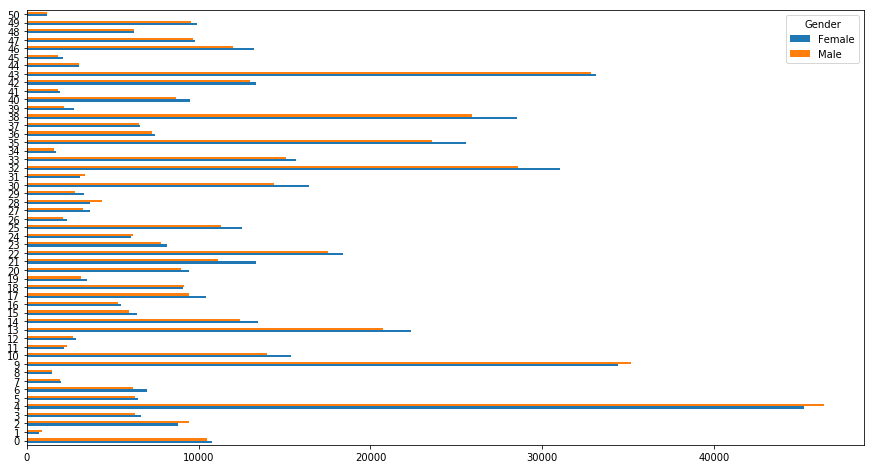

In [179]:
pivot.plot(kind='barh',figsize=(15,8))

Notice the Y-axis is currently just a list of numbers.  That's because when we reset the index, it defaulted to assigning integers as the index for the DataFrame.  Let's set the index back to `'State'`, and then recreate the visualization. 

In the cell below:

* Use the `pivot` object's `set_index()` method and set the index to `'State'`.  Then, chain this with a `.plot()` call to recreate the visualization using the code we used in the cell above.  

All the code in this cell should be done in a single line.  Just call the methods--do not rebind `pivot` to be equal to this line of code. 

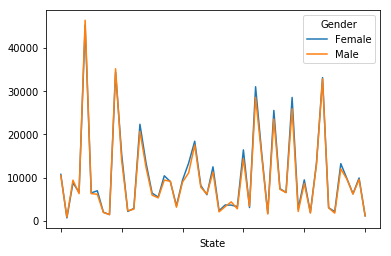

In [186]:
pivot.set_index('State').plot()
#Where's the states?! Notice the y-axis is just a list of numbers.
#This is populated by the DataFrame's index.
#When we used the .reset_index() method, we created a new numbered index to name each row. 
#Let's fix that by making state the index again.



Now, that we've created a visualization with the states as the y-axis, let's print out the head of the `pivot` object again. 

In [187]:
# Also notice that if we call the DataFrame pivot again, state is not it's index.
#The above method returned a DataFrame with State as index and we plotted it,
#but it did not update the DataFrame itself.
pivot.head()

Gender,State,Female,Male
0,Alabama,10753.325000,10503.585366
1,Alaska,679.975000,860.357143
2,Arizona,8800.622222,9405.659574
3,Arkansas,6621.615385,6301.690476
4,California,45233.297872,46406.297872


Note that the index has not changed.  That's because the code we wrote when we set the index to the 'State' column returns a copy of the DataFrame object with the index set to 'State'--by default, it does not mutate original `pivot` object.  

If we want to do that, we'll need to capture the new object returned by updating the contents of the `pivot` variable.  

In the cell below, set the index of `pivot` to `'State'`.  Then, recreate the bar plot using this new object.  

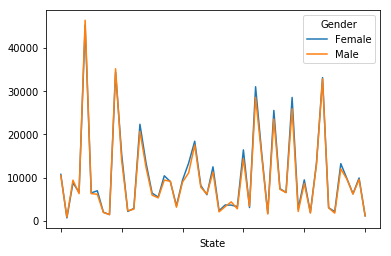

In [188]:
#If we wanted to more permanently change the index we would set it first and then plot:
pivot = pivot.set_index('State')
pivot.plot()

Again, let's check the head of the DataFrame to confirm that the index structure has changed.  

In [189]:
pivot

Gender,Female,Male
State,,
Alabama,10753.325000,10503.585366
Alaska,679.975000,860.357143
Arizona,8800.622222,9405.659574
Arkansas,6621.615385,6301.690476
California,45233.297872,46406.297872
Colorado,6460.162791,6299.911111
Connecticut,6966.325000,6161.878049
Delaware,2000.029412,1940.914286
District of Columbia,1451.125000,1443.545455


Finally, let's stack these bar charts to see how that looks. 

In the cell below, recreate the visualization we did in the cell above, but this time, also pass in `stacked=True` as a parameter. 

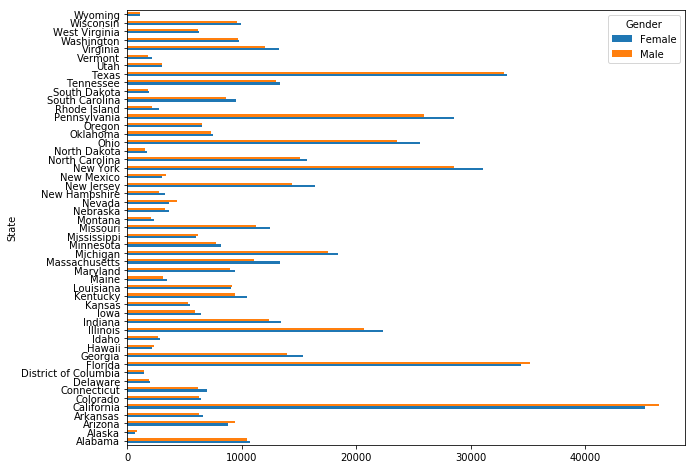

In [191]:
# Lastly, let's stack each of these bars for each state.
#Notice we don't have to worry about index here, because we've already set it above.
pivot.plot(kind='barh',figsize=(10,8))

## Stacking and Unstacking DataFrames

Now, let's get some practice stacking and unstacking DataFrames. 

### Stacking

In the cell below, let's display the head of `grouped` to remind ourselves of the format we left it in. 

In [192]:
grouped.head()

,State,Gender,Deaths_mean,Deaths_min,Deaths_max,Deaths_std,Population_mean,Population_min,Population_max,Population_std
0,Alabama,Female,10753.325000,10,116297,24612.250487,1.078713e+06,2087.0,4334752.0,1.400309e+06
1,Alabama,Male,10503.585366,10,88930,20620.218089,1.014946e+06,1129.0,4284775.0,1.397830e+06
2,Alaska,Female,679.975000,13,4727,1154.870455,1.440403e+05,1224.0,682855.0,2.015793e+05
3,Alaska,Male,860.357143,12,5185,1411.777392,1.518884e+05,578.0,770502.0,2.238843e+05
4,Arizona,Female,8800.622222,21,133923,25979.871632,1.246502e+06,12211.0,6265346.0,2.096632e+06


As we can see above, `grouped` is currently in a flattened format, with no hierarchical structure to it's indices.  

In the cell below, call the `grouped` DataFrame's `.stack()` method. 

In [193]:
grouped.stack()

0    State                  Alabama
     Gender                  Female
     Deaths_mean            10753.3
     Deaths_min                  10
     Deaths_max              116297
     Deaths_std             24612.3
     Population_mean    1.07871e+06
     Population_min            2087
     Population_max     4.33475e+06
     Population_std     1.40031e+06
1    State                  Alabama
     Gender                    Male
     Deaths_mean            10503.6
     Deaths_min                  10
     Deaths_max               88930
     Deaths_std             20620.2
     Population_mean    1.01495e+06
     Population_min            1129
     Population_max     4.28478e+06
     Population_std     1.39783e+06
2    State                   Alaska
     Gender                  Female
     Deaths_mean            679.975
     Deaths_min                  13
     Deaths_max                4727
     Deaths_std             1154.87
     Population_mean         144040
     Population_min         

As we can see, the `stack()` method has stacked our DataFrame from a flattened format into one with a multi-hierarchical index! This is an easy, quick way to aggregate our data.

### Unstacking 

Now, we'll explore unstacking with the `pivot` DataFrame, which is already stacked into a pivot table. 

In the cell below, set unstack `pivot` using the object's `.unstack()` method. Then, display the object to see how it has changed. 

In [ ]:
pivot = pivot.unstack()

Note that it has unstacked the multi-hierarchical structure of the `pivot` DataFrame by one level. Let's call it one more time and display the results!

In the cell below, set pivot equal to `pivot.unstack()` again, and then display the `pivot` object to see how things have changed.

In [ ]:
pivot = None

After calling unstack a second time, we can see that `pivot` has a flattened structure, since it has been completely unstacked!

## Summary

In this lab, we learned how to:

* Use `groupby` to stack and slice data conditionally
* Use aggregate functions in combination with groupby statements
* Create pivot tables with pandas
* Leverage pivot tables and groupby statements to create quick visualizations
* `stack` and `unstack` DataFrames 